# **Topic Modeling(Model Building)**

###**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud,STOPWORDS

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import classification_report

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 22.3 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


##**Load Dataset**

In [ ]:
df = df=pd.read_csv('topic_data')
df.head()

,Text,Topic
0,statistic datum apply statistic scientific ind...,Statistic
1,today statistic widely employ government busin...,Statistic
2,sample mathematical discipline probability the...,Statistic
3,statistic random variable function random samp...,Statistic
4,critical region set value estimator lead refut...,Statistic


##**Data Preprocessing**

In [ ]:
df.reset_index(inplace=True)
df = df.drop(['index'],axis=1)
df

,Text,Topic
0,statistic datum apply statistic scientific ind...,Statistic
1,today statistic widely employ government busin...,Statistic
2,sample mathematical discipline probability the...,Statistic
3,statistic random variable function random samp...,Statistic
4,critical region set value estimator lead refut...,Statistic
5,comprise descriptive_statistics application in...,Statistic
6,statistic also heavily use management accounti...,Statistic
7,social medium interactive technology allow cre...,Social_medium
8,mobile social medium useful application mobile...,Social_medium
9,scientist use social medium share scientific k...,Researches


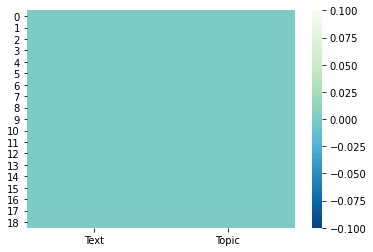

In [ ]:
sns.heatmap(df.isnull(),cmap="GnBu_r")

In [ ]:
df.dropna(inplace=True)

##**EDA**

In [ ]:
df.describe().T

,count,unique,top,freq
Text,19,19,comprise descriptive_statistics application in...,1
Topic,19,5,Statistic,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19 non-null     object
 1   Topic   19 non-null     object
dtypes: object(2)
memory usage: 432.0+ bytes


####Let's add a column as a part of Feature Engg to check the number of words in the Article

In [ ]:
df['length'] = df['Text'].apply(len)
df

,Text,Topic,length
0,statistic datum apply statistic scientific ind...,Statistic,4484
1,today statistic widely employ government busin...,Statistic,2547
2,sample mathematical discipline probability the...,Statistic,5039
3,statistic random variable function random samp...,Statistic,4543
4,critical region set value estimator lead refut...,Statistic,3184
5,comprise descriptive_statistics application in...,Statistic,2183
6,statistic also heavily use management accounti...,Statistic,1556
7,social medium interactive technology allow cre...,Social_medium,5379
8,mobile social medium useful application mobile...,Social_medium,14834
9,scientist use social medium share scientific k...,Researches,15914


In [ ]:
df.reset_index(inplace=True)
df = df.drop(['index'],axis=1)
df

,Text,Topic,length
0,statistic datum apply statistic scientific ind...,Statistic,4484
1,today statistic widely employ government busin...,Statistic,2547
2,sample mathematical discipline probability the...,Statistic,5039
3,statistic random variable function random samp...,Statistic,4543
4,critical region set value estimator lead refut...,Statistic,3184
5,comprise descriptive_statistics application in...,Statistic,2183
6,statistic also heavily use management accounti...,Statistic,1556
7,social medium interactive technology allow cre...,Social_medium,5379
8,mobile social medium useful application mobile...,Social_medium,14834
9,scientist use social medium share scientific k...,Researches,15914


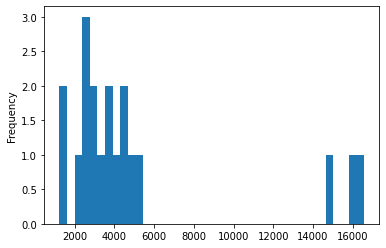

In [ ]:
df['length'].plot(bins=40,kind='hist')

In [ ]:
#df['length'] =np.(df['length'] )
#df['length'].plot(bins=40,kind='hist')

In [ ]:
df.length.describe()

count       19.000000
mean      5296.210526
std       4791.717664
min       1240.000000
25%       2732.500000
50%       3734.000000
75%       4791.000000
max      16552.000000
Name: length, dtype: float64

##**Label Encoding**

In [ ]:
df['Topic'] = LabelEncoder().fit_transform(df['Topic'])

df['Topic']

0     4
1     4
2     4
3     4
4     4
5     4
6     4
7     3
8     3
9     2
10    2
11    3
12    2
13    1
14    2
15    0
16    2
17    0
18    0
Name: Topic, dtype: int64

##**Train Test Split**

In [ ]:
X = df['Text'].values
Y = df['Topic'].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33)

##**Text Preprocessing**

In [ ]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [ ]:
def clean(doc):
  stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
  punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
  normalized = [lemma.lemmatize(word) for word in punc_free.split()]
  return normalized

##**Text Vectorization**

In [ ]:
bow_trans = CountVectorizer().fit(X)
print(len(bow_trans.vocabulary_))

2860


In [ ]:
ev_bow = bow_trans.transform(x_train)

In [ ]:
ev_test = bow_trans.transform(x_test)

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(max_features = 1500,ngram_range=(1,1))
#X_train= cv.fit_transform(x_train).toarray()
#X_test= cv.fit_transform(x_test).toarray()

In [ ]:
#bows_trans= CountVectorizer()


In [ ]:
#X_train= bow_trans.transform(x_train)

In [ ]:
#X_test = bow_trans.transform(x_test)#

In [ ]:
#X_train= X_train.reshape(1,-1) 

In [ ]:
#X_train.shape

(15, 1500)

In [ ]:
#X_test.shape

(4, 715)

In [ ]:
#X_test= X_test.reshape(1,-1) 

In [ ]:
print('Shape of Sparse Matrix : ',ev_bow.shape)
print('Amount of non-zero occurences : ',ev_bow.nnz)

Shape of Sparse Matrix :  (12, 2019)
Amount of non-zero occurences :  3697


##**Model Building**

### **Naive Bayes** 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
alpha = [0.1,1,3]
params = dict(alpha=alpha)
cv = KFold(n_splits=10)
grid  = GridSearchCV(clf,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))

Best Score is 0.55 and Best params are {'alpha': 0.1}


In [ ]:
clf = MultinomialNB(alpha=1)
clf.fit(ev_bow,y_train)
y_pred_test = clf.predict(ev_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2

    accuracy                           0.71         7
   macro avg       0.62      0.75      0.67         7
weighted avg       0.57      0.71      0.62         7



### **SVM**

In [ ]:
from sklearn.svm import SVC
clf2 = SVC()
kernel = ['rbf','poly']
C = [50,10,1,0.1]
gamma = ['auto','scale']
params = dict(kernel=kernel,C=C,gamma=gamma)
cv = KFold(n_splits=5)
grid  = GridSearchCV(clf2,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))

Best Score is 0.5 and Best params are {'C': 50, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
clf2 = SVC(C=50,kernel='rbf',gamma='auto')
clf2.fit(ev_bow,y_train)
y_pred_test2 = clf2.predict(ev_test)
print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         2
           4       0.50      1.00      0.67         2

    accuracy                           0.57         7
   macro avg       0.50      0.62      0.54         7
weighted avg       0.43      0.57      0.48         7



### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier()
n_estimators = [50,100,200,500]
max_depth = [50,100,200]
params = dict(n_estimators=n_estimators,max_depth=max_depth)
cv = KFold(n_splits=5)
grid  = GridSearchCV(clf3,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))

Best Score is 0.5 and Best params are {'max_depth': 50, 'n_estimators': 50}


In [ ]:
clf3 = RandomForestClassifier(n_estimators=500,max_depth=100)
clf3.fit(ev_bow,y_train)
y_pred_test3 = clf3.predict(ev_test)
print(classification_report(y_test,y_pred_test3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         2
           4       0.40      1.00      0.57         2

    accuracy                           0.43         7
   macro avg       0.23      0.38      0.27         7
weighted avg       0.26      0.43      0.31         7



### **Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf4 = BaggingClassifier()
params = {'n_estimators':[10,50,100,200]}
cv = KFold(n_splits=5)
grid  = GridSearchCV(clf4,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))

Best Score is 0.4333333333333333 and Best params are {'n_estimators': 50}


In [ ]:
clf4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=150)
clf4.fit(ev_bow,y_train)
y_pred_test4 = clf4.predict(ev_test)
print(classification_report(y_test,y_pred_test4))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2

    accuracy                           0.57         7
   macro avg       0.46      0.62      0.52         7
weighted avg       0.45      0.57      0.50         7



### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf5 = DecisionTreeClassifier()
params = {'criterion':['gini','entropy'],'max_depth':[50,100,200]}
cv = KFold(n_splits=5)
grid  = GridSearchCV(clf5,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))

Best Score is 0.7666666666666666 and Best params are {'criterion': 'entropy', 'max_depth': 100}


In [ ]:
clf5 = DecisionTreeClassifier(criterion='entropy',max_depth=50)
clf5.fit(ev_bow,y_train)
y_pred_test5 = clf5.predict(ev_test)
print(classification_report(y_test,y_pred_test5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.67      1.00      0.80         2
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2

    accuracy                           0.86         7
   macro avg       0.92      0.88      0.87         7
weighted avg       0.90      0.86      0.85         7



### **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf6 = AdaBoostClassifier()
params = {'n_estimators':[50,100,200],'learning_rate':[0.1,1]}
cv = KFold(n_splits=5)
grid  = GridSearchCV(clf6,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))

Best Score is 0.4333333333333333 and Best params are {'learning_rate': 0.1, 'n_estimators': 50}


In [ ]:
clf6 = AdaBoostClassifier(n_estimators=10,learning_rate=0.1)
clf6.fit(ev_bow,y_train)
y_pred_test6 = clf6.predict(ev_test)
print(classification_report(y_test,y_pred_test6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2

    accuracy                           0.86         7
   macro avg       0.92      0.88      0.87         7
weighted avg       0.90      0.86      0.85         7



### **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf7 = GradientBoostingClassifier()
params = {'n_estimators':[50,100,200],'learning_rate':[0.1,1,10],'loss':['exponential','deviance']}
cv = KFold(n_splits=5)
grid  = GridSearchCV(clf7,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))

Best Score is 0.5333333333333333 and Best params are {'learning_rate': 10, 'loss': 'deviance', 'n_estimators': 200}


In [ ]:
clf7 = GradientBoostingClassifier(loss='deviance',n_estimators=50,learning_rate=0.1)
clf7.fit(ev_bow,y_train)
y_pred_test7 = clf7.predict(ev_test)
print(classification_report(y_test,y_pred_test7))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         2

    accuracy                           0.57         7
   macro avg       0.42      0.62      0.49         7
weighted avg       0.40      0.57      0.47         7



### **XGBoost**

In [ ]:
from xgboost import XGBClassifier
clf8 = XGBClassifier()
params = {'n_estimators': [50,100,200], "learning_rate" : [0.1,1], "max_depth" : [10,50,100]}
cv = KFold(n_splits=5)
grid  = GridSearchCV(clf8,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(ev_bow,y_train)
print('Best Score is {} and Best params are {}'.format(grid.best_score_,grid.best_params_))


Best Score is 0.6666666666666666 and Best params are {'learning_rate': 1, 'max_depth': 10, 'n_estimators': 50}


In [ ]:
clf8 = XGBClassifier(n_estimators=50,max_depth=30,learning_rate=0.01)
clf8.fit(ev_bow,y_train)
y_pred_test8 = clf8.predict(ev_test)
print(classification_report(y_test,y_pred_test8))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2

    accuracy                           0.29         7
   macro avg       0.20      0.20      0.20         7
weighted avg       0.29      0.29      0.29         7



## **Save Model**

In [ ]:
import pickle
pickle.dump(clf, open('clff.pickle','wb'))

In [ ]:
loaded_model = pickle.load(open("clff.pickle", "rb"))
loaded_model.predict(ev_test)
loaded_model.score(ev_test,y_test)

0.7142857142857143